The goal of this code is to take in images (of reduced resolution) and generate random patches of a specified dimension (ala point counting). The model will take in these images and generate classifications. 

In [2]:

import numpy as np
from matplotlib import pyplot as plt 
from PIL import image

ImportError: cannot import name 'image' from 'PIL' (/opt/conda/lib/python3.13/site-packages/PIL/__init__.py)

In [ ]:
#img = Image.open('image.jpg')
#resized_img = img.resize((2000,3000)) #can use to resize image to given specifications
#patches = patchify.patchify(np.asarray(resized_img), patch_size = (100,100, 3), step = 100)


In [8]:
# In numpy randomly
import numpy as np
from skimage import data
import matplotlib.pyplot as plt 
import math

def randomPatches(resized_img, patch_size, num_patches):
    collect = []
    for i in range(num_patches):
        img_to_arr = np.asarray(resized_img)
        x = np.random.randint(img_to_arr.shape[0]-patch_size)
        y = np.random.randint(img_to_arr.shape[1]-patch_size)
        print(f"Upper Left Coordinate: ({x}, {y})")
        random_patches = img_to_arr[x:x+patch_size, y:y + patch_size]
        collect.append(random_patches)
    return collect


(872, 1000, 3)
Upper Left Coordinate: (503, 521)
Upper Left Coordinate: (341, 211)
Upper Left Coordinate: (178, 34)
Upper Left Coordinate: (501, 81)
Upper Left Coordinate: (516, 55)
Upper Left Coordinate: (477, 306)
Upper Left Coordinate: (445, 67)
Upper Left Coordinate: (75, 145)
Upper Left Coordinate: (571, 628)
Upper Left Coordinate: (722, 425)


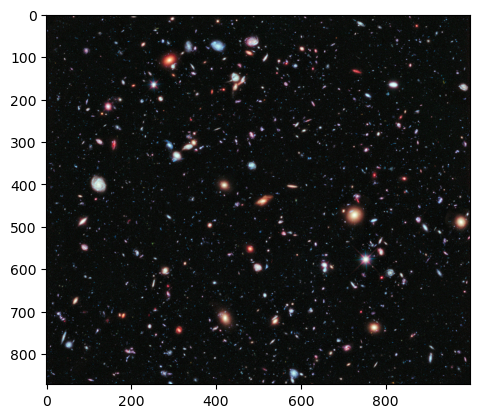

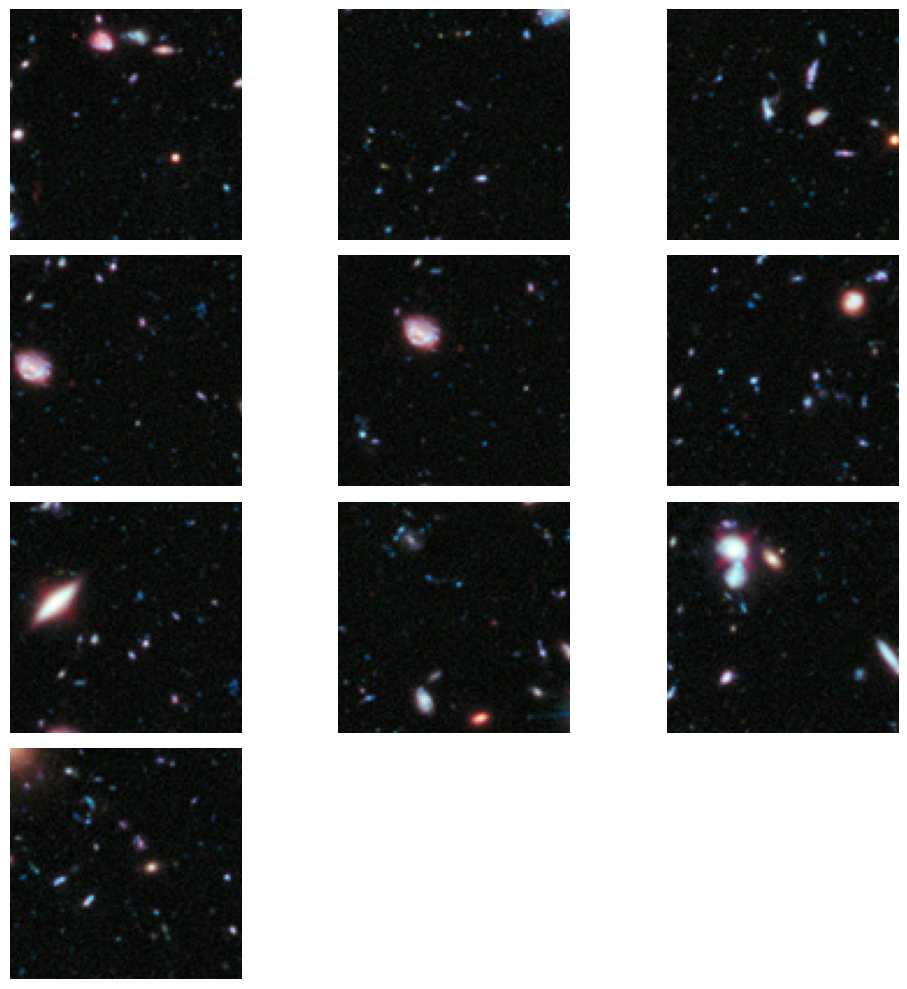

In [9]:
# Test on sklearn images
image = data.hubble_deep_field()
print(image.shape)
plt.imshow(image)

patches = randomPatches(image, 100, 10)

n = len(patches)
cols = int(math.sqrt(n))
rows = math.ceil(n/cols)
plt.figure(figsize = (10,10))
for i, patch in enumerate(patches):
    plt.subplot(rows, cols, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.tight_layout()
plt.show()

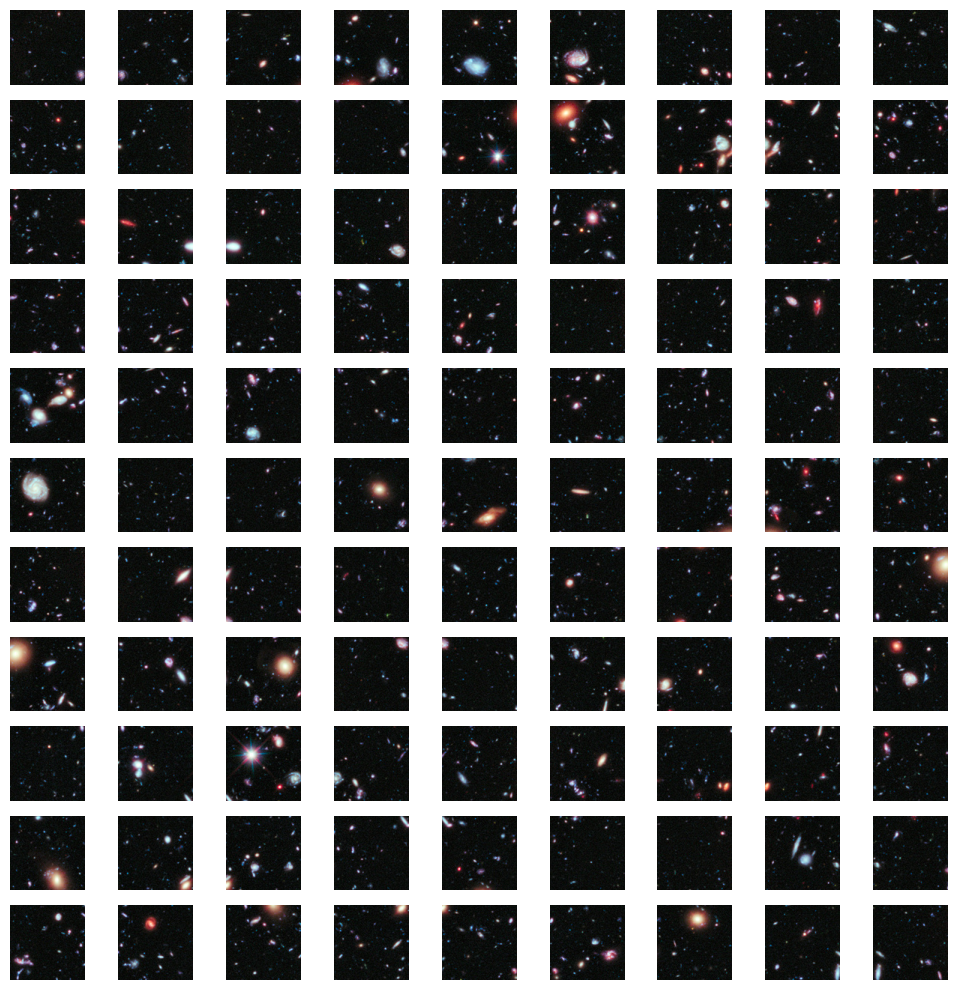

In [10]:
def patchGrid(resized_img, patch_size, overlap):
    step_size = patch_size - overlap
    height, width = resized_img.shape[:2]
    patches = []
    for y in range(0, height - patch_size + 1, step_size):
        for x in range(0, width - patch_size + 1, step_size):
            patch = resized_img[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
    return patches

image = data.hubble_deep_field()

patches = patchGrid(image, 100, 10)

n = len(patches)
cols = int(math.sqrt(n))
rows = math.ceil(n/cols)
plt.figure(figsize = (10,10))
for i, patch in enumerate(patches):
    plt.subplot(rows, cols, i+1)
    plt.imshow(patch)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
import os
from skimage import io

input_folder = "50PercentRes_Images"
output_folder = "Output_Patches_50Res_300Pixels"
np.random.seed(42)
patch_size = 300
num_patches = 10

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# -------- PROCESS ALL FILES --------
for filename in os.listdir(input_folder):

    # Only process image files
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".tif")):
        
        filepath = os.path.join(input_folder, filename)
        image = io.imread(filepath)

        patches = randomPatches(image, patch_size, num_patches)

        # Get base filename (without extension)
        base_name = os.path.splitext(filename)[0]

        # Save patches
        for i, patch in enumerate(patches):
            output_name = f"{base_name}_patch{i+1}.png"
            output_path = os.path.join(output_folder, output_name)
            io.imsave(output_path, patch)

Upper Left Coordinate: (1126, 860)
Upper Left Coordinate: (1294, 1130)
Upper Left Coordinate: (1095, 1638)
Upper Left Coordinate: (121, 466)
Upper Left Coordinate: (1238, 330)
Upper Left Coordinate: (1482, 2135)
Upper Left Coordinate: (1396, 130)
Upper Left Coordinate: (1685, 769)
Upper Left Coordinate: (343, 1515)
Upper Left Coordinate: (1437, 2433)
Upper Left Coordinate: (1215, 955)
Upper Left Coordinate: (276, 1184)
Upper Left Coordinate: (459, 21)
Upper Left Coordinate: (252, 747)
Upper Left Coordinate: (856, 474)
Upper Left Coordinate: (1082, 2558)
Upper Left Coordinate: (1499, 975)
Upper Left Coordinate: (189, 562)
Upper Left Coordinate: (1590, 1267)
Upper Left Coordinate: (831, 1528)
Upper Left Coordinate: (1154, 646)
Upper Left Coordinate: (20, 2214)
Upper Left Coordinate: (1297, 2435)
Upper Left Coordinate: (600, 2363)
Upper Left Coordinate: (13, 241)
Upper Left Coordinate: (776, 2612)
Upper Left Coordinate: (897, 1363)
Upper Left Coordinate: (91, 1390)
Upper Left Coordinate: 

/opt/conda/lib/python3.13/site-packages/skimage/_shared/utils.py:328: UserWarning: Output_Patches_50Res_300Pixels/resized_opd_8.0b_patch9.png is a low contrast image
  return func(*args, **kwargs)


Upper Left Coordinate: (116, 936)
Upper Left Coordinate: (574, 2291)
Upper Left Coordinate: (536, 1625)
Upper Left Coordinate: (74, 385)
Upper Left Coordinate: (1233, 474)
Upper Left Coordinate: (417, 2394)
Upper Left Coordinate: (1552, 2687)
Upper Left Coordinate: (938, 954)
Upper Left Coordinate: (875, 762)
Upper Left Coordinate: (1202, 1205)
Upper Left Coordinate: (663, 24)
Upper Left Coordinate: (1203, 709)
Upper Left Coordinate: (1524, 1879)
Upper Left Coordinate: (1184, 2224)
Upper Left Coordinate: (284, 62)
Upper Left Coordinate: (1002, 661)
Upper Left Coordinate: (665, 2203)
Upper Left Coordinate: (1492, 966)
Upper Left Coordinate: (848, 1107)
Upper Left Coordinate: (1384, 688)
Upper Left Coordinate: (147, 341)
Upper Left Coordinate: (475, 1086)
Upper Left Coordinate: (1383, 2608)
Upper Left Coordinate: (326, 1792)
Upper Left Coordinate: (1164, 989)
Upper Left Coordinate: (214, 2482)
Upper Left Coordinate: (951, 722)
Upper Left Coordinate: (1341, 2079)
Upper Left Coordinate: (6

/opt/conda/lib/python3.13/site-packages/skimage/_shared/utils.py:328: UserWarning: Output_Patches_50Res_300Pixels/resized_opf_85.0b_patch2.png is a low contrast image
  return func(*args, **kwargs)


Upper Left Coordinate: (806, 1463)
Upper Left Coordinate: (1342, 1325)
Upper Left Coordinate: (1367, 10)
Upper Left Coordinate: (1085, 1868)
Upper Left Coordinate: (225, 2611)
Upper Left Coordinate: (771, 1594)
Upper Left Coordinate: (1607, 1333)
Upper Left Coordinate: (884, 1389)
Upper Left Coordinate: (1353, 225)
Upper Left Coordinate: (824, 2265)
Upper Left Coordinate: (936, 2553)
Upper Left Coordinate: (258, 1911)
Upper Left Coordinate: (1540, 1796)
Upper Left Coordinate: (53, 726)
Upper Left Coordinate: (688, 1544)
Upper Left Coordinate: (1122, 1043)
Upper Left Coordinate: (1596, 1914)
Upper Left Coordinate: (1513, 2466)
Upper Left Coordinate: (689, 849)
Upper Left Coordinate: (61, 2263)
Upper Left Coordinate: (2, 159)
Upper Left Coordinate: (780, 892)
Upper Left Coordinate: (1112, 2376)
Upper Left Coordinate: (579, 1933)
Upper Left Coordinate: (1380, 1290)
Upper Left Coordinate: (1640, 951)
Upper Left Coordinate: (1346, 2682)
Upper Left Coordinate: (987, 1218)
Upper Left Coordina